In [5]:
# Exemplo 2 - Classificar se um E-mail é spam ou não
import pandas as pd

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/danielvieira95/Inteligencia_Artificial_2025/refs/heads/main/bases_de_dados/dadosspam.csv')

In [7]:
df.head() # exibe as 4 primeiras linhas do dataser

,frequencia_palavras,presenca_links,num_anexos,comprimento_email,spam
0,6,0,1,793,0
1,3,0,1,698,0
2,7,1,1,455,1
3,4,1,1,810,0
4,6,0,3,620,1


In [12]:
# Dividindo os dados em x y y para separação
x = df.drop('spam',axis=1) # exclui a coluna spam e armazenar as outras colunas do dataset
y = df['spam'] # armazena a coluna spam

In [13]:
# importando a biblioteca para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split # biblioteca para dividir os dados em treino e teste

In [48]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) # random state garante a reprodutibilidade do modelo em outras máquinas


In [16]:
# importanto as bibliotecas para machine learning
from sklearn.svm import SVC # importa a biblioteca svm e o modelo SVC
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,f1_score,classification_report

In [17]:
# Criando o modelo SVM
model = SVC(kernel='linear') # Cria o modelo SVM

In [18]:
# Treino do modelo
model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [49]:
# Fazendo predições
y_prev = model.predict(x_test)
y_prev # exibe as previsões

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [7]:
# Analisando as métricas do modelo
#acc = accuracy_score(y_test,y_prev)
#prec = precision_score(y_test,y_prev)
f1_score = f1_score(y_test,y_prev)
#print(f'Acurácia:{acc}')
#print(f'precisão:{prec}')
print(f'f1_score:{y_prev}')


NameError: name 'f1_score' is not defined

In [51]:
# Matriz de confusão
cm = confusion_matrix(y_test,y_prev)
cm

array([[149,   0],
       [  4, 147]])

In [52]:
# importando as bibliotecas para plotar a magtriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.722222222222214, 0.5, 'Previsão')

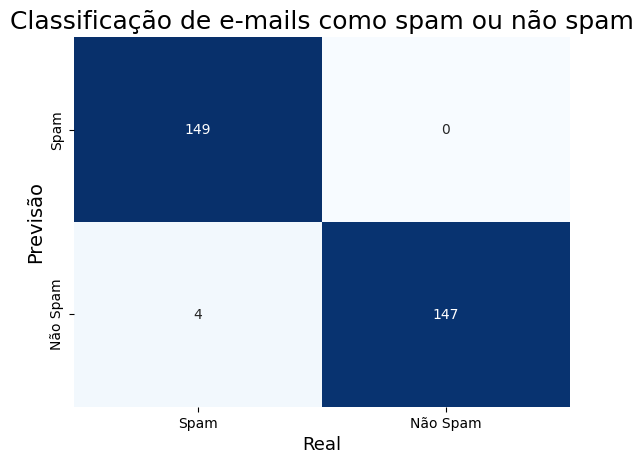

In [58]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Spam', 'Não Spam'],
            yticklabels=['Spam', 'Não Spam'])
plt.title('Classificação de e-mails como spam ou não spam',fontsize=18)
plt.xlabel('Real',fontsize=13)
plt.ylabel('Previsão',fontsize=14)

In [55]:
# Realizando a contagem das predições
spam_count = sum(y_prev)
non_spam_count = len(y_prev) - spam_count

print(f'Spam:{spam_count}')
print(f'Não spam: {non_spam_count}')

Spam:147
Não spam: 153


C:\Users\dsadm\AppData\Local\Temp\ipykernel_113624\3884870911.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Não Spam', 'Spam'],y=[non_spam_count,spam_count],palette=cor,legend=False) # palete cor do heatmap


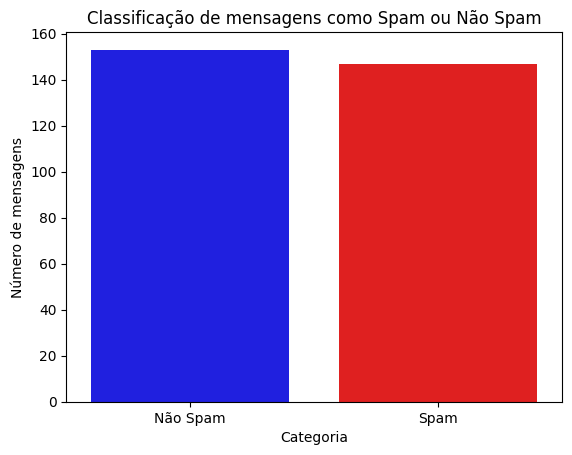

In [73]:
# Gráfico de barras
plt.Figure(figsize=(8, 6))
cor = ['blue','red']
sns.barplot(x=['Não Spam', 'Spam'],y=[non_spam_count,spam_count],palette=cor,legend=False) # palete cor do heatmap
plt.xlabel('Categoria')
plt.ylabel('Número de mensagens')
plt.title('Classificação de mensagens como Spam ou Não Spam')
plt.grid(False)
plt.show()